# Milestone 4 - Independent Project

## Author - Emily McAfee

## Instructions

1. Generate a clear statement problem and provide the location for the datasetyou use.
2. Provide a clear solution to the problem for a non-technical audience.
3. Visually explore the data to generate insight and include summary statistics.
4. Use an appropriate statistical analysis method.
5. Prepare the data via cleaning, normalization, encoding, et cetera.
6. Generate and evaluate a working model (hypothesis, linear, or time series).
7. Draw direct inferences and conclusions from model results.
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

## Generate a clear statement problem/provide location of data
A developer is interested in building in King County, WA. The company wants to know what features of a house (i.e. zip code, # of floors) will yield a high price.

## Provide a clear solution to the problem

When attempting to predict a high price, you must first determine what that high price is (i.e > 500,000) and create a new column  within our data set, this will be the value we will try to predict with other features (i.e. zip code, # of floors).

We will then use a part of our data set to 'train' a model, or have it perform multiple regressions to learn if there are any relationships between features and our predicted value (house price). Then we will see if the model works on another part of the data set that does not have house price information and see if we predicted correctly.

If the accuracy of the model is low, we will change which features (i.e. zip code, lot size) we used to predict the price, and see if our prediction accuracy increases.



In [2]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load data
fileName = "https://drive.google.com/uc?export=download&id=1TqcnKvPJnuuEMVZYpx2H-hOf5Kaw_LUu"

# Read the .csv file with the pandas read_csv method
house_data = pd.read_csv(fileName, header = 0)


In [4]:
# Look at various aspects of the data to ensure things loaded in correctly
print(house_data.dtypes)
print(house_data.loc[:,'bedrooms'].head())
house_data.loc[:, 'id'].head()
house_data.loc[:,'date'].head()

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
0    3
1    3
2    2
3    4
4    3
Name: bedrooms, dtype: int64


0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

## Visually explore the data to generate insight

### Summary statistics

In [5]:
# Summary statistics on housing data
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### What can we learn from the summary statistics?

First, let's start with *price* as that is very important to the seller. From the above summary statistics we can see the average price of a homein King County, WA is __$540,088.10__. On average, these house have __3 bedrooms__, __2 bathrooms__, and are anywhere from __1 to 2 floors__. This is extremely helpful to the developer, as it let's them know genrally what customers would be favoring in a home and can use this information for basic proposals and mock ups.

Just looking at the interquartile ranges (IQR) there don't appear to be any large descrpencies between them, but some exploratory data anlysis (EDA) will assist in having those patterns come through.

### Boxplot of price by # of bedrooms

Text(0,0.5,'price')

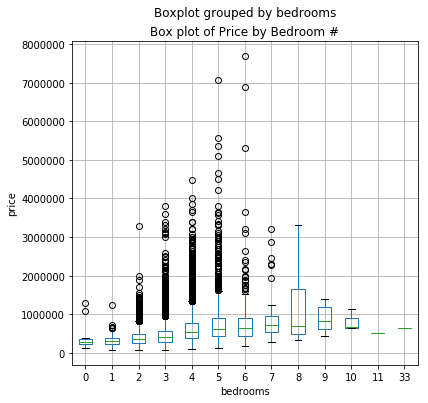

In [6]:
# Define plot area
bxplt1 = plt.figure(figsize=(6, 6))

# Define axis
ax1 = bxplt1.gca()

# Place the data on the axis
house_data.loc[:,['bedrooms', 'price']].boxplot(by = 'bedrooms', ax = ax1)
ax1.set_title('Box plot of Price by Bedroom #')
ax1.set_xlabel('bedrooms')
ax1.set_ylabel('price')

#### What can we learn from the boxplot?

While the above boxplot informs us on price according to bedroom, it is also a good check of our summary statistics. At first glance the scale on the y axis seems a bit extreme (house prices at almost 8 million dollars - wow!), but if we go back to our summary statistics we can see that this is infact the case. However, as indicated by our IQRs for each bedroom number, most homes are under 2 million dollars. The home prices that have the most spread are the 5 and 6 bedroom homes. A possibly good business insight that can be drawn from this is that 5/6 bedrooms home prices can vary widely and it may encourage the investor to build these types of homes and be prepared if the market drops or increases, there is possibly more fleibility for selling price.

In terms of our model, knowing the amount of spread is important to keep in mind because it may suggest that number of bedrooms is not always an indicator of price.

### Histogram of prices

Text(0.5,0,'House price')

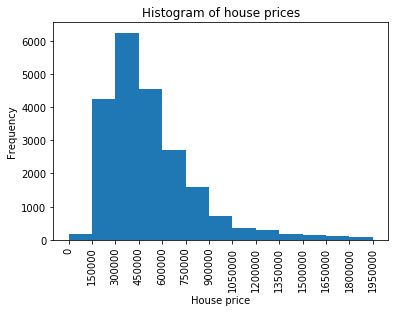

In [16]:
# Create boolean array of houses that are under 2 million
typicalprice = house_data.loc[:,'price'] < 2000000

# Check data
typicalprice.head()

# Create df of only these houses
typicalprice1 = house_data[typicalprice]
typicalprice1.head()

# Create histogram
typicalprice1.loc[:,'price'].plot.hist(bins = np.arange(0, 2000000,150000))
plt.xticks(np.arange(0, 2000000, 150000), rotation = 90)
plt.title('Histogram of house prices')
plt.xlabel('House price')

#### What can we learn from the histogram?

Before creating the histogram, homes over 2 million dollars were removed. As seen in our boxplot, the majority of our houses are under this price. If we were to create a histogram with these higher end prices, the histogram would be very long and not yield very much helpful information. By removing those outliers we are able to clearly see that most homes are between 300,000 dollars and 450,000 dollars. 

### Frequency table of # of houses by zipcode/most homes by zipcode

In [17]:
# Look at data
sorted(set(house_data.loc[:,'zipcode'].unique()))

# Make column for counts
house_data['zipcounts'] = 1

# Show organized frequency table based on counts column
print(house_data[['zipcounts', 'zipcode']].groupby(['zipcode']).agg('count'))

# Show top five
topzip = house_data[['zipcounts', 'zipcode']].groupby(['zipcode']).agg('count')

topzip.nlargest(10, 'zipcounts')


         zipcounts
zipcode           
98001          362
98002          199
98003          280
98004          317
98005          168
98006          498
98007          141
98008          283
98010          100
98011          195
98014          124
98019          190
98022          234
98023          499
98024           81
98027          412
98028          283
98029          321
98030          256
98031          274
98032          125
98033          432
98034          545
98038          590
98039           50
98040          282
98042          548
98045          221
98052          574
98053          405
...            ...
98092          351
98102          105
98103          602
98105          229
98106          335
98107          266
98108          186
98109          109
98112          269
98115          583
98116          330
98117          553
98118          508
98119          184
98122          290
98125          410
98126          354
98133          494
98136          263
98144       

,zipcounts
zipcode,
98103,602
98038,590
98115,583
98052,574
98117,553
98042,548
98034,545
98118,508
98023,499


#### What can we learn from the frequency table?
Above are two frequency tables, one shows counts for all homes in their respective zip codes. The second, smaller, frequency table shows the top ten zip codes with the largest amount of houses. This could generate possible business insight by showing developers where there are already flourishing commuties. The opposite could also be done with frequency tables, showing the zipcodes with the least amount of houses.

### Hexbin plot of year built versus square feet

Text(0,0.5,'Square feet')

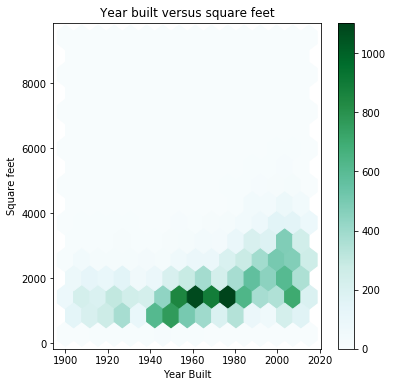

In [8]:
ax2 = plt.figure(figsize = (6, 6)).gca()
house_data.plot.hexbin(x = 'yr_built', y = 'sqft_above', gridsize = 15, ax = ax2)

ax2.set_title('Year built versus square feet')
ax2.set_xlabel('Year Built')
ax2.set_ylabel('Square feet')

#### What can this hexbin plot tell us?

The most common home type are those that were built in the early 1960s and late 1970s with ~1500 square feet. Another general trend to make note of is that homes seem to be getting consistently bigger (i.e. more square footage) after the 1980s. It would be worth considering as a business insight if this type of home size growth is sustainable for the market.